<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [194]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [195]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [196]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [197]:
# Answer:
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [198]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

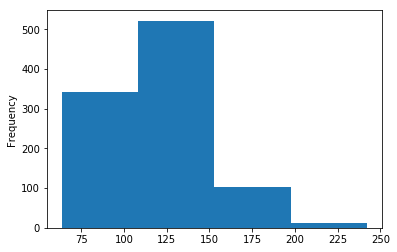

In [199]:
# Answer:
movies.loc[:,'duration'].plot(kind='hist', bins=4)

#### Use a box plot to display that same data.

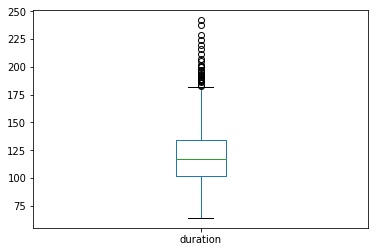

In [200]:
# Answer:
movies.loc[:,'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [201]:
# Answer:
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'Count')

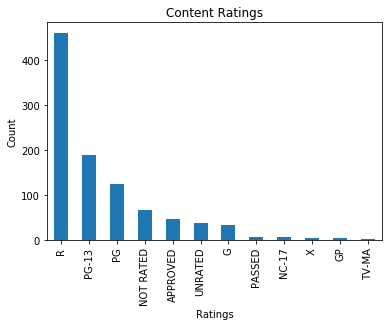

In [202]:
# Answer:
content_ratings_chart = movies.loc[:,'content_rating'].value_counts().plot(kind='bar')

content_ratings_chart.set_title('Content Ratings')
content_ratings_chart.set_xlabel('Ratings')
content_ratings_chart.set_ylabel('Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [203]:
#Answer:

unrated = movies.content_rating.isin(['NOT RATED', 'APPROVED', 'PASSED', 'GP'])
movies.loc[unrated,'content_rating'] = 'UNRATED'

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [204]:
# Answer:
nc17 = movies.content_rating.isin(['X' ,'TV-MA'])
movies.loc[nc17, 'content_rating'] = 'NC-17'

#### Count the number of missing values in each column.

In [205]:
# Answer:

print('start_rating: ', movies.loc[:,'star_rating'].isnull().sum())

print('title: ', movies.loc[:,'title'].isnull().sum())

print('content ratings: ', movies.loc[:,'content_rating'].isnull().sum())

print('genre: ', movies.loc[:,'genre'].isnull().sum())

print('duration: ', movies.loc[:,'duration'].isnull().sum())

print('actors_list: ', movies.loc[:,'actors_list'].isnull().sum())


start_rating:  0
title:  0
content ratings:  3
genre:  0
duration:  0
actors_list:  0


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [206]:
# Answer:

isnull_content_rating = movies.loc[:,'content_rating'].isnull()
movies.loc[isnull_content_rating,'content_rating'] = 'PG'

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [207]:
# Answer:

movies_greaterthan_120min = movies.loc[:,'duration'] >= 120
movies.loc[movies_greaterthan_120min, :'star_rating'].mean()

star_rating    7.948899
dtype: float64

In [208]:
movies_lessthan_120min = movies.loc[:,'duration'] < 120
movies.loc[movies_lessthan_120min, :'star_rating'].mean()

star_rating    7.838667
dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

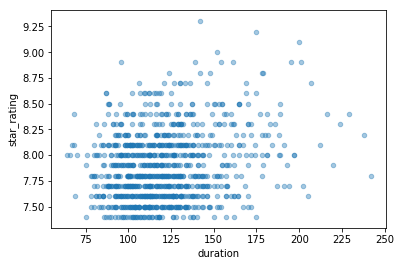

In [209]:
# Answer:
movies.plot(kind = 'scatter', x = 'duration', y = 'star_rating', alpha = .4)

#### Calculate the average duration for each genre.

In [186]:
# Answer:

movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

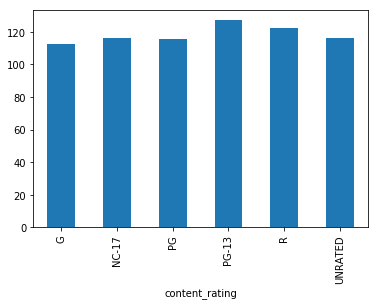

In [226]:
# Answer:
movies.groupby('content_rating')['duration'].mean().plot(kind='bar')

/Users/naidaire/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


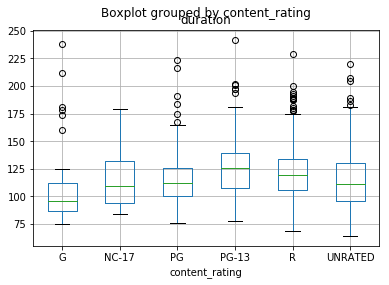

In [228]:
movies.boxplot(column='duration', by='content_rating');

#### Determine the top rated movie (by star rating) for each genre.

In [245]:
# Answer:

movies.groupby(['genre']).max()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,Yojimbo,UNRATED,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L..."
Adventure,8.9,True Grit,UNRATED,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va..."
Animation,8.6,Wreck-It Ralph,UNRATED,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb..."
Biography,8.9,Walk the Line,UNRATED,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi..."
Comedy,8.6,Zombieland,UNRATED,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
Crime,9.3,Zodiac,UNRATED,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K..."
Drama,8.9,Zulu,UNRATED,242,"[u'William Holden', u'Gloria Swanson', u'Erich..."
Family,7.9,Willy Wonka & the Chocolate Factory,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [286]:
# Answer:

#Check for duplicates by summing up duplicate titles
movies.duplicated(['title']).sum()

#View only the duplicate titles
movies[movies.loc[:,'title'].duplicated()]


,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [340]:
# Answer:

#Manual list of genres that have at least 10 movies
genre_list = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 
              'Adventure', 'Animation', 'Horror', 'Mystery']

#filter movies dataframe against the genre_list using isin() function
in_genre_list1 = movies.loc[movies.genre.isin(genre_list)]

# calculate mean star_rating for each genre using groupby() function
in_genre_list1.groupby('genre')['star_rating'].mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [343]:
# Answer:

# create genre_count list with Genre and their value_counts
genre_count = movies.loc[:,'genre'].value_counts()

# create index list of genres than are >= 10
genre_count_greaterthan10 = genre_count[genre_count >= 10].index

# filter movies dataframe against genre_count_greaterthan10 list 
# using isin() function
in_genre_list2 = movies.loc[movies.genre.isin
                            (genre_count_greaterthan10)]

# calculate mean star_rating for each genre using groupby() function
in_genre_list2.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [354]:
# Answer:


movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [362]:
# Answer:

genre_ratings_countandmean = movies.groupby('genre')['star_rating'].agg(['count', 'mean'])
genre_ratings_countandmean[genre_ratings_countandmean['count'] >= 10]


,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!